<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

***1. Object***: Use Linear Regression with one variable to predict the profit of one bike-sharing company

***2. Question***: Now I am a CEO of a bike-sharing company, and am considering different cities to set the bikes into. I have already have bikes in various cities and have the data. I need the data to help me predict the profit if I would like to set the bikes in those new cities. To decide which city to expand my bikes next.

***3. Data***: bike_sharing_data.txt

### Task 2: Load the Data and Libraries
---

In [56]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd  # to manage the data: import and store as a dataframe
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8) #画布尺寸

In [58]:
# link colab to google drive to read the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera Project/Linear Regression with NumPy/bike_sharing_data.txt')
data.head()

# population & profit: in the unit of 10,000

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [60]:
# to get more insight
data.info()

# dataframe has 97 entries---data for 97 cities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

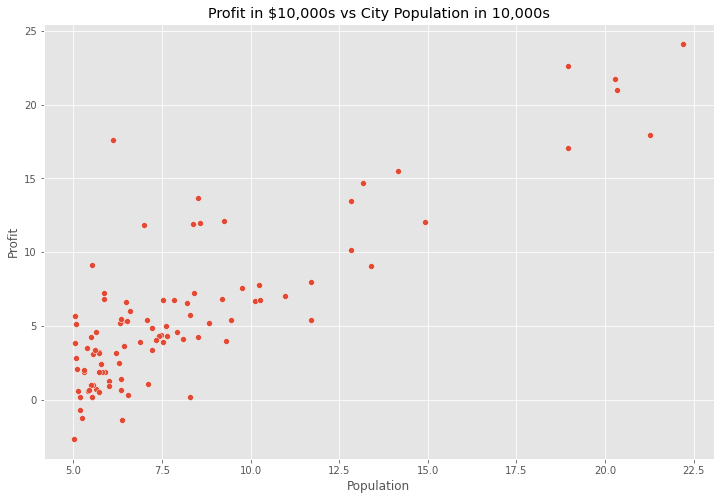

In [61]:
# Because only 2 variables, we can use scatter plot for the data
# use seaborn to plot

ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Profit in $10,000s vs City Population in 10,000s");
# remember to put ; in the end

There is a general trend of the data

***What we need to do***: 
  1. find the straight line that best fit the data (Find linear relationship between the population and profit
  2. Use the straight line and new data
  3. Predict new profit using new data

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [62]:
# 1/m is to normalize the data
# 1/2 is only math convenience, it will be cancelled out later
# x and y are not scalars but matrices

In [63]:
# need to define the function and implement it

def cost_function(x, y, theta):
  m = len(y)             # m
  y_pred = x.dot(theta)  # hθ(x)
  error = (y_pred - y) ** 2  #平方项

  return 1/(2*m) * np.sum(error)

Gradient Descent: learning to minimize the cost function, monitor the convergence, implement a function to evaluate j of theta

Before use GD: need to assign m, x, y, theta


In [64]:
? np.append()

# Signature: np.append(arr, values, axis=None)
# Docstring: Append values to the end of an array.
# >>> np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)
# array([[1, 2, 3],
     #   [4, 5, 6],
     #   [7, 8, 9]])
# axis=0 行往下堆 以行的形式添加
# axis=1 列往右堆 以列的形式添加

?np.ones()

# np.ones((2, 1))  行+列
# array([[1.],
#       [1.]])

?np.reshape()

# Signature: np.reshape(a, newshape, order='C')
# Docstring: Gives a new shape to an array without changing its data

# np.reshape(a, (3,-1))  变成3行2列
# np.reshape(a, 6) 变成1行6列
# np.reshape(a, 6, order='F') 变成1行6列且乱序

In [65]:
# m is the length of training vector as seen in the formula
m = data.Population.values.size   

# x 首先是 m行1列的矩阵，append 变换成(m行1列）的Population的矩阵后，axis=1 列往右堆
# 变成 m行2列的矩阵
# To accomodate the intercept term and set it to all ones
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m,1), axis=1)

# y是Profit的value但是转换成 m行1列
y = data.Profit.values.reshape(m,1)

# 先暂定theta全是0：2行1列  这样和x相乘会变成m行1列
theta = np.zeros((2,1))

# call function
cost_function(x,y,theta) 

# 输出的是cost的数值

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [66]:
# 每次都把theta变化一下 缩小一点的意思
# 因为需要每次都换一个theta 所以需要迭代

def gradient_descent(x, y, theta, alpha, iterations):
  m = len(y)
  
  costs=[]  # create a list of value of theta, 可以帮助visualize 和帮助理解梯度下降

  for i in range(iterations):
    y_pred=x.dot(theta)
    error=np.dot(x.transpose(), (y_pred-y))
    theta -= alpha* 1/m * error
    costs.append(cost_function(x,y,theta))
  return theta, costs

In [67]:
theta, costs = gradient_descent(x,y,theta,alpha=0.01,iterations=2000)

print("h(x) = {} + {}×1".format(str(round(theta[0,0],2)),
                           str(round(theta[1,0],2))))

# intercept term + model coefficient * feature 1
# format to the string 
# round down to theta value 0行0列 & 1行0列 to 2 decimal places

h(x) = -3.79 + 1.18×1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [69]:
? np.linspace

# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
# Docstring: Return evenly spaced numbers over a specified interval.
# 切片 平均输出


?np.array()

# Docstring: array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
     # like=None)
#Create an array.

In [70]:
# 2-d array of theta0 & theta 1 / cost values

theta_0 = np.linspace(-10,10,100) #因为之前算出来theta0是正的
theta_1 = np.linspace(-1,4,100)   #因为之前算出来theta1是负的

cost_values = np.zeros((len(theta_0),len(theta_1)))  #把cost_value弄成一个矩阵 全是0的initial值

# iterate through the space of theta_0 and theta_1
for i in range((len(theta_0))):  #有几个theta0
  for j in range (len(theta_1)):   #有几个theta1
    t = np.array([theta_0[i], theta_1[j]])  #已经有了值了 transform to 一个array
    cost_values[i,j] = cost_function(x,y,t)  #调用costfunction给array赋值


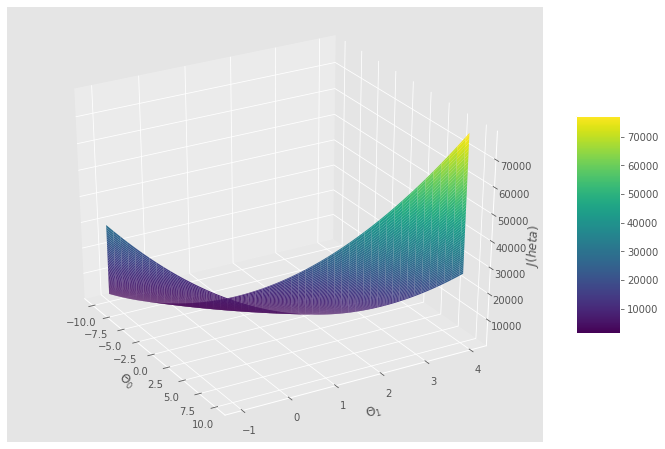

In [71]:
# use the values to produce a surface plot / cost function

fig=plt.figure(figsize = (12,8))  # 添加一张12*8的画布

# create a projection of 3d to 2d

ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap = 'viridis')  #plot
# divergent colormap

fig.colorbar(surf,shrink=0.5,aspect=5) # set the color bar next to the figure

# plot labels and titles
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\theta)$')

ax.view_init(30,330) # initial angle by 30-300 degrees



The figure shows how the value of cost of j change through theta-0 and theta-1.


Cost funtion j of theta: bold shape---minimun: optimal for theta0 and theta1

Next: plot convergence


### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

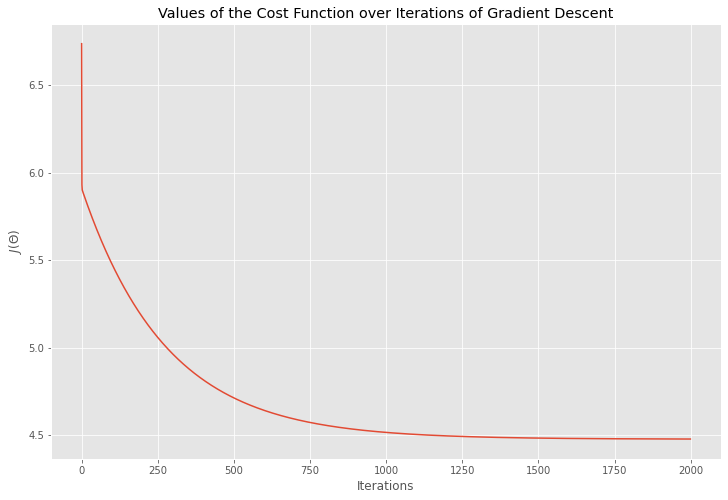

In [72]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

adjust the learning rate and try again


Learning Rate too large: j of theta diverge and blow up 会return NAN
 

### Task 8: Training Data with Linear Regression Fit
---

In [73]:
theta.shape  # 是2×1的矩阵

(2, 1)

In [74]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [76]:
# 需要把theta sqeeze: get out of other extra dimensions

theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data
                
# drawing the line

# create 2 lists
x_value=[x for x in range(5,25)]

#因为scatter里的x是大概5-25

# y 用 linear regression function to calculate
y_value = [(x*theta[1]+theta[0]) for x in x_value]

sns.lineplot(x_value,y_value)
             
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

SyntaxError: ignored

### Task 9: Inference using the optimized $\theta$ values
---

use the regression line for inference

$h_\theta(x) = \theta^Tx$

In [ ]:
# make inference easier, can define a function for calculating hθx

def predict(x,theta):
  y_pred=np.dot(theta.transpose(),x)
  return y_pred


In [ ]:
# case 1: 40,000 people

y_pred_1 = predict(np.array([1,4]),theta)*10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(y_pred_1))

In [ ]:
# case 2: 83,000 people

y_pred_2 = predict(np.array([1,8.3]), theta) *10000

print("For a population of 93,000 people, the model predicts a profit of $" + str(y_pred_2))